In [178]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from heapq import nlargest
import seaborn as sns

In [179]:
# read in the dataset about who followed whom

df = pd.read_csv('user_full_info.csv')
df.columns

Index(['Unnamed: 0', 'user_id', 'follow_user_id', 'strength',
       'Unnamed: 0_actual', 'id_actual', 'name_actual', 'screen_name_actual',
       'statuses_count_actual', 'followers_count_actual',
       'friends_count_actual', 'favourites_count_actual',
       'Account Type_actual', 'Group Type_actual', 'Unnamed: 0_follows',
       'id_follows', 'name_follows', 'screen_name_follows',
       'statuses_count_follows', 'followers_count_follows',
       'friends_count_follows', 'favourites_count_follows',
       'Account Type_follows', 'Group Type_follows'],
      dtype='object')

In [180]:
# define a color scheme per account type for later graphs and assigned each account to it

color_map = {"spam": "#FF0000", "fake":"#FFFF00", "real":"#A0CBE2"}

In [181]:
#map all accounts to the color scheme according to their type and create a list of colors for the graphs

act_user_cat = pd.Series(df['Account Type_actual'].values, index=df.name_actual).to_dict()
foll_user_cat = pd.Series(df['Account Type_follows'].values, index=df.name_follows).to_dict()
all_user_cat = {**act_user_cat, **foll_user_cat}

colors=[]
for u in all_user_cat.keys():
    colors.append(color_map[all_user_cat[u]])
    
len(colors)

2252

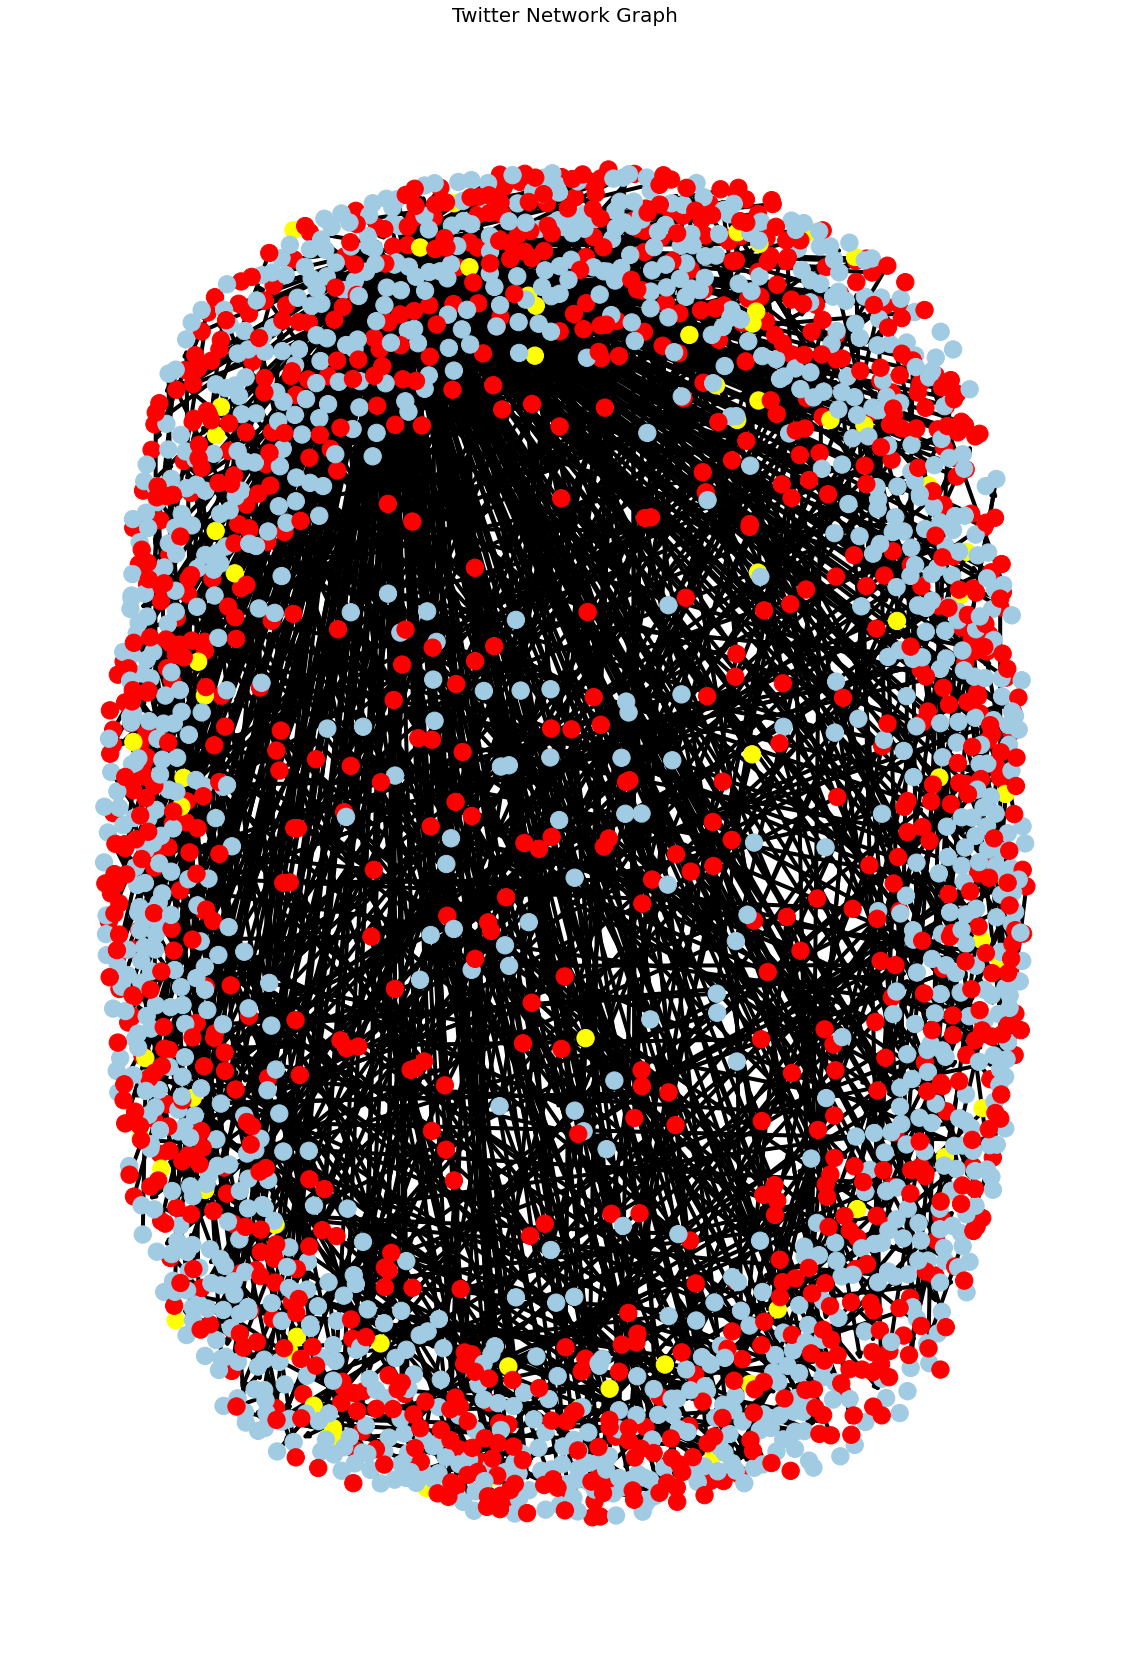

In [182]:
#who follows whom?
#create a network graph using draw_networkx function and the nodes being colored to their account's type

graph = nx.from_pandas_edgelist(df, source = 'name_actual', target = 'name_follows', create_using = nx.DiGraph())
plt.figure(figsize=(20,30))
pos = nx.spring_layout(graph,k=0.20,iterations=20)
nx.draw_networkx(graph, pos, arrows=True, node_color=colors, width=4, with_labels=False)
plt.title("Twitter Network Graph", fontsize=20)
plt.axis('off')
plt.show()

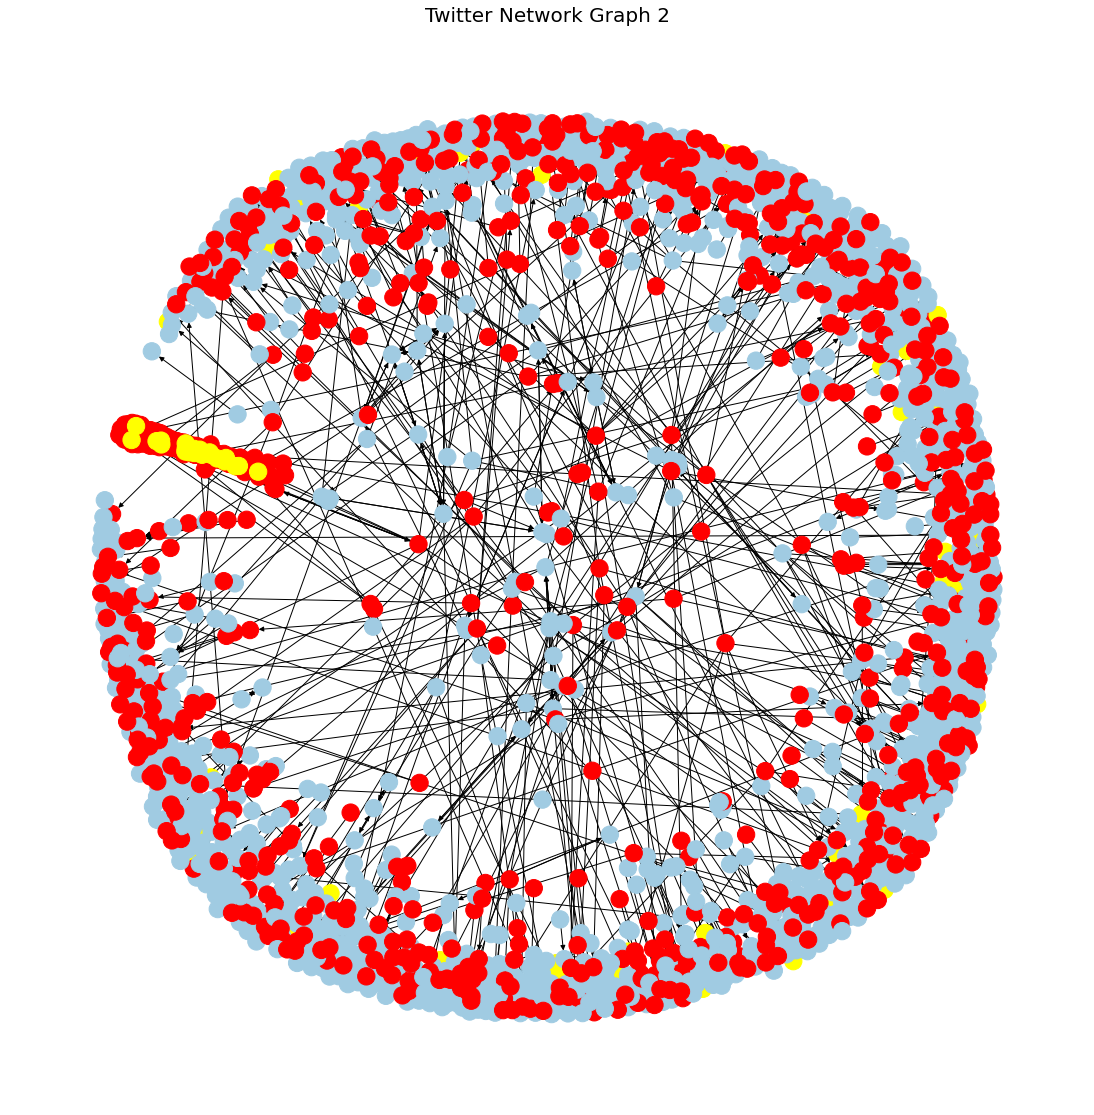

In [183]:
#who follows whom? Part2
#create a network graph using draw function (more basic than draw_networkx) and the nodes being colored to their account's type

plt.figure(figsize=(15,15))
nx.draw(graph, with_labels=False, node_color=colors)
plt.title("Twitter Network Graph 2", fontsize=20)
plt.show()

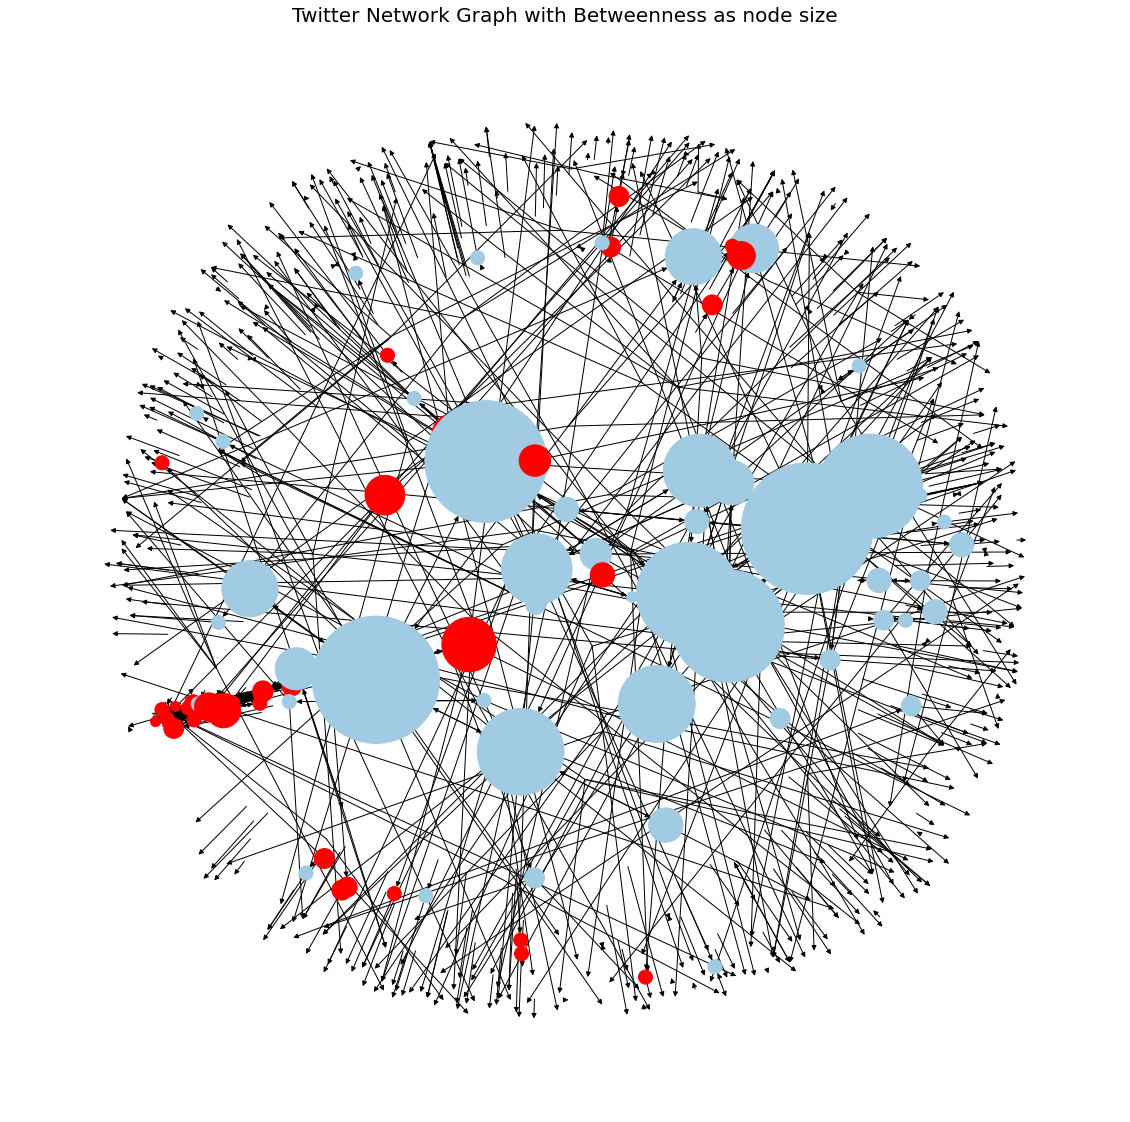

In [184]:
#is there some correlation between account type and betweennness centrality measure?
#create a list of betweenness measure for each node and set the node size to that measure

rt_centrality = nx.betweenness_centrality(graph, seed=42)
node_size = [v * 1000000000 for v in rt_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, with_labels=False, node_color=colors, node_size=node_size)
plt.title("Twitter Network Graph with Betweenness as node size", fontsize=20)
plt.axis('off')
plt.show()

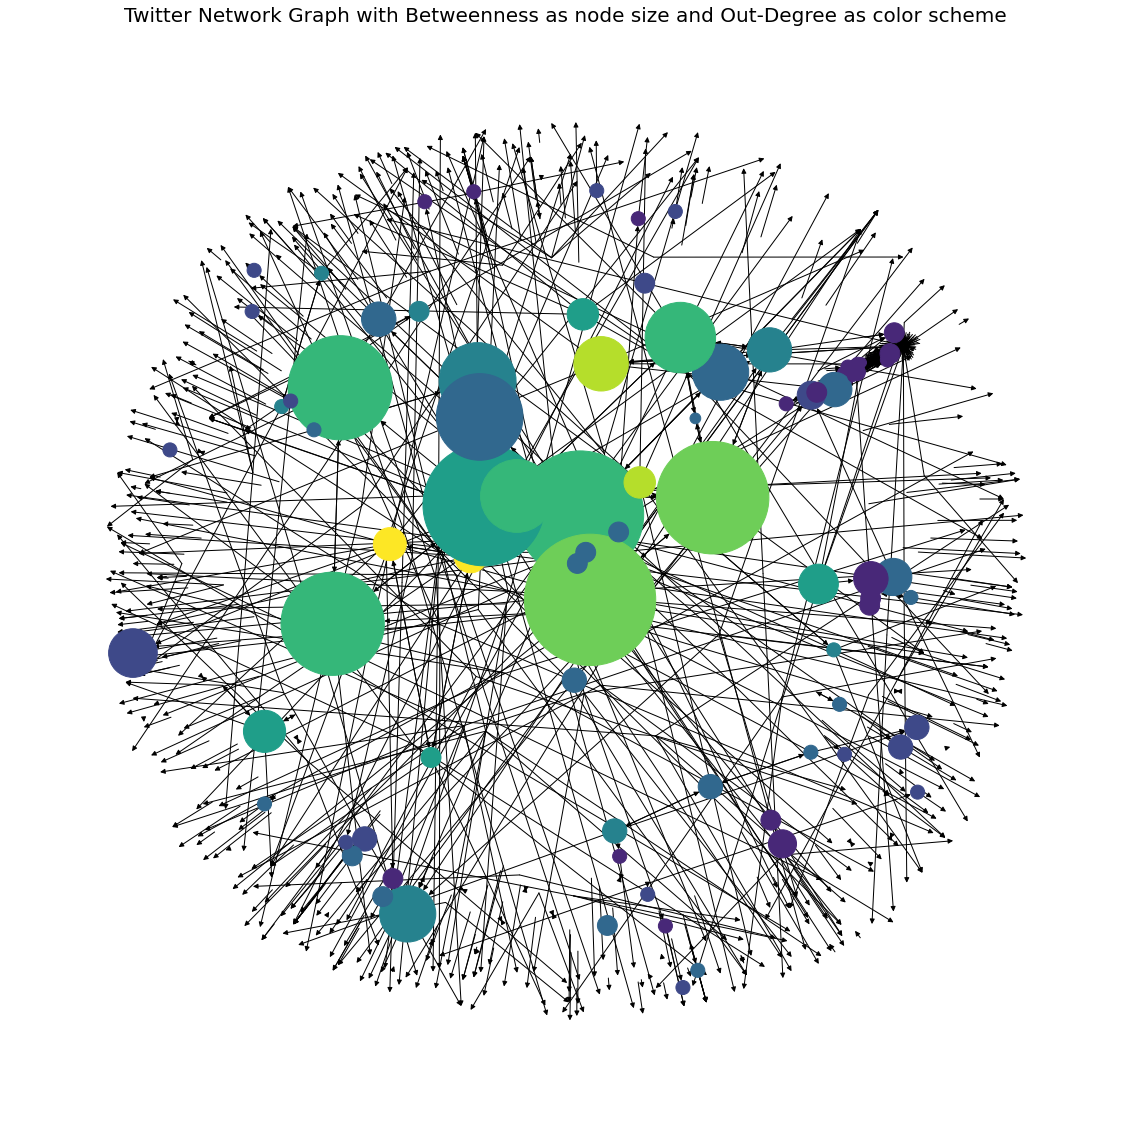

In [185]:
#is there a relationship between betweenness centrality and out degree centrality?
#replace the account type coloring by the account's out degree centrality measure (the higher the measure the more yellow the node)

rt_centrality = nx.betweenness_centrality(graph, seed=42)
node_color = [200000000.0 * graph.out_degree(v) for v in graph]
node_size = [v * 1000000000 for v in rt_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, with_labels=False, node_color=node_color, node_size=node_size)
plt.title("Twitter Network Graph with Betweenness as node size and Out-Degree as color scheme", fontsize=20)
plt.axis('off')
plt.show()

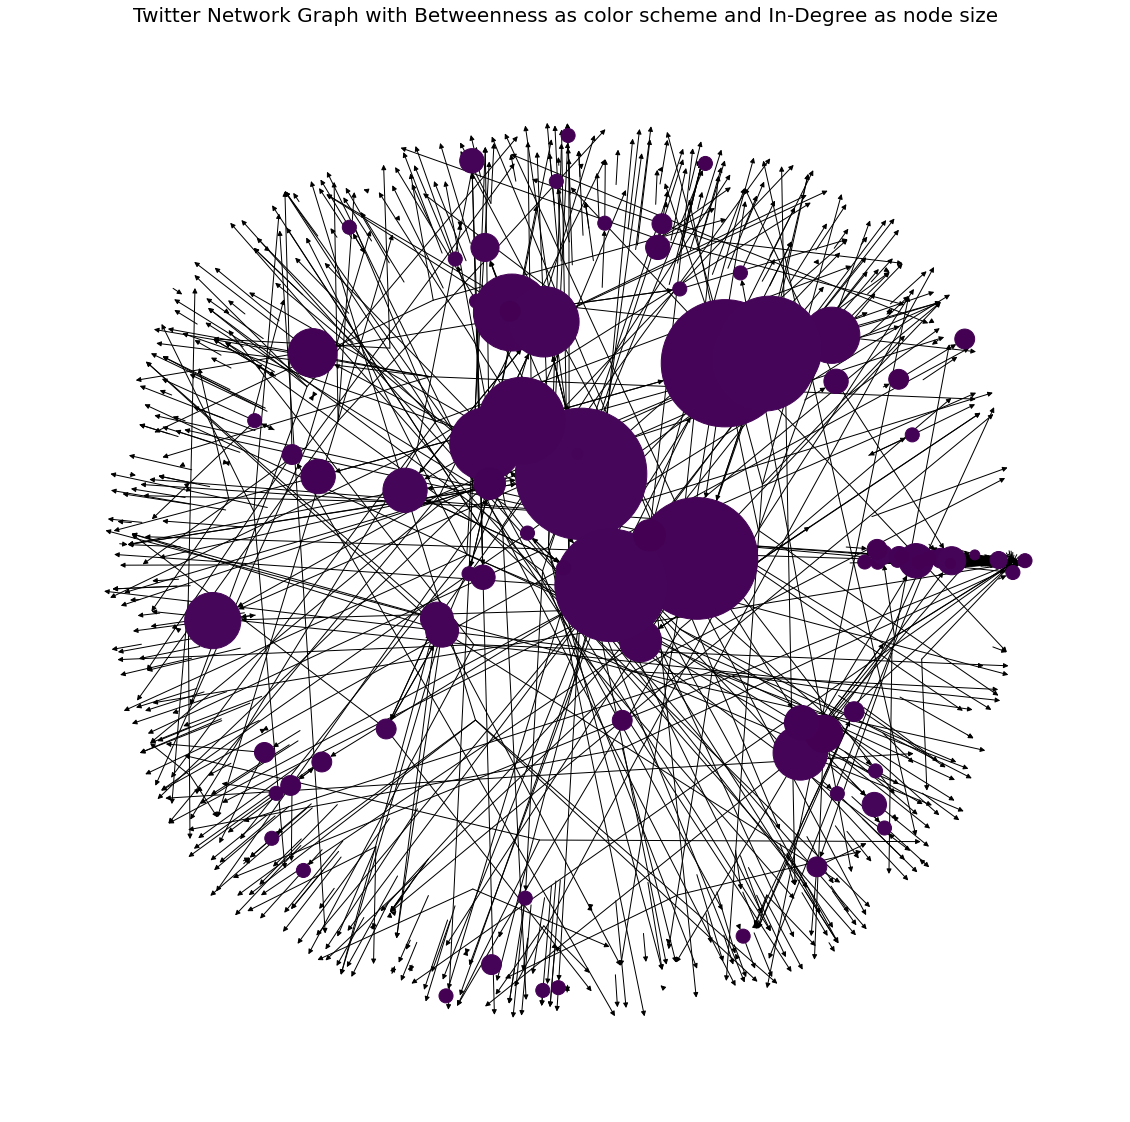

In [186]:
#is there a relationship between betweenness centrality and in degree centrality?
#replace the account type coloring by the account's in degree centrality measure (the higher the measure the more yellow the node)

rt_centrality = nx.betweenness_centrality(graph, seed=42)
node_color = [200000000.0 * graph.in_degree(v) for v in graph]
node_size = [v * 1000000000 for v in rt_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, with_labels=False, node_color=node_color, node_size=node_size)
plt.title("Twitter Network Graph with Betweenness as color scheme and In-Degree as node size", fontsize=20)
plt.axis('off')
plt.show()

#can't see much! --> reasons is that all nodes have quite the same in degree centrality score

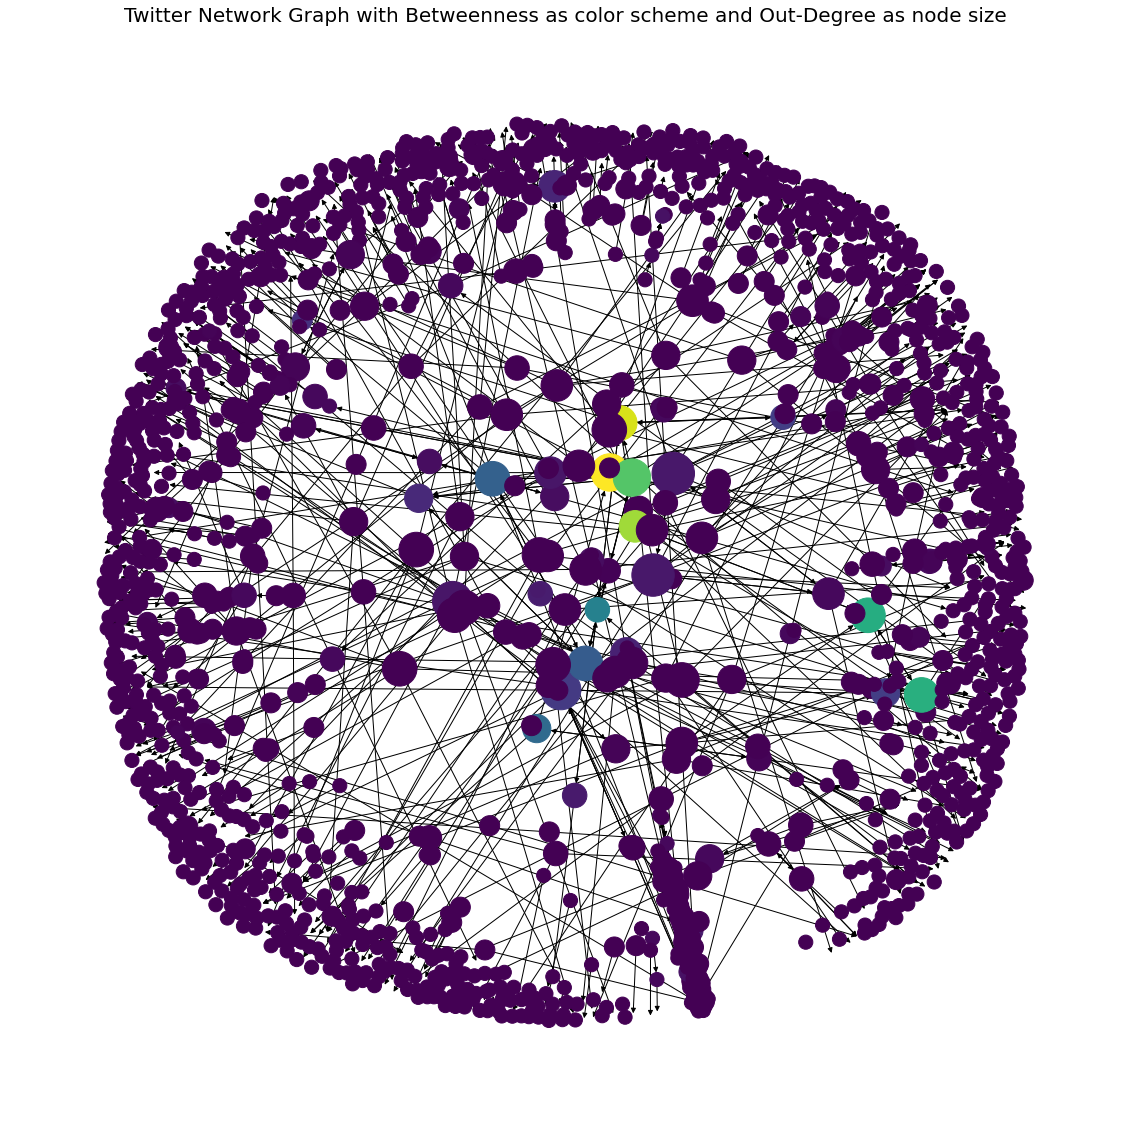

In [187]:
#is there a relationship between betweenness centrality and out degree centrality?
#replace the account type coloring by the account's out degree centrality measure (the higher the measure the more yellow the node)

rt_centrality = nx.betweenness_centrality(graph, seed=42)
node_size = [200.0000000 * graph.out_degree(v) for v in graph]
node_color = [v * 1000000000.000000 for v in rt_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, with_labels=False, node_color=node_color, node_size=node_size)
plt.title("Twitter Network Graph with Betweenness as color scheme and Out-Degree as node size", fontsize=20)
plt.axis('off')
plt.show()

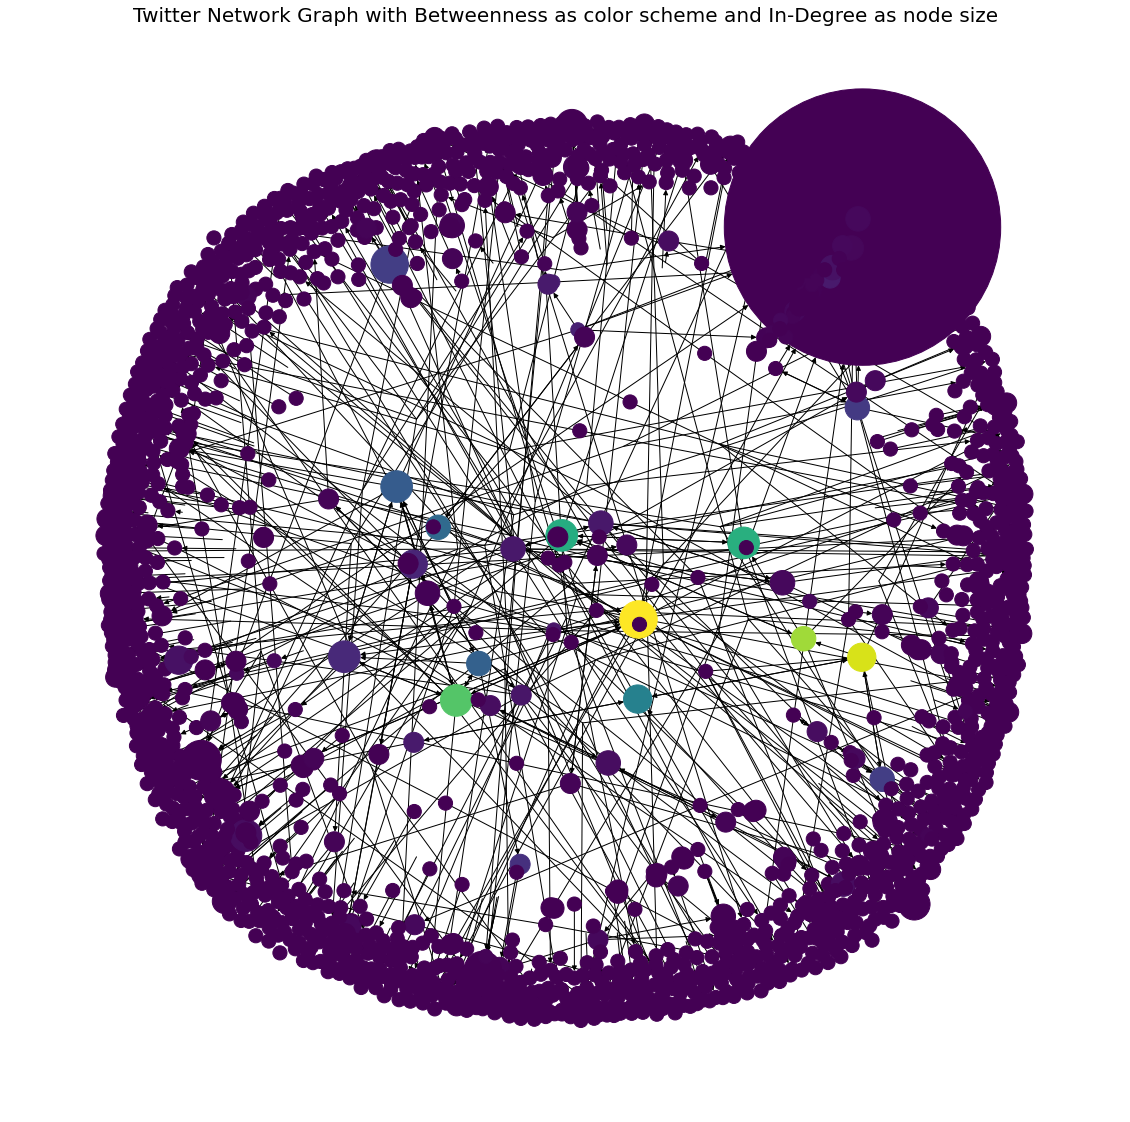

In [188]:
#does swapping the coloring and sizing basis make a difference?
#set the in degree centrality as the node size and the betweenness as the color scheme

rt_centrality = nx.betweenness_centrality(graph, seed=42)
node_size = [200.0000000 * graph.in_degree(v) for v in graph]
node_color = [v * 1000000000000000 for v in rt_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph, with_labels=False, node_color=node_color, node_size=node_size)
plt.title("Twitter Network Graph with Betweenness as color scheme and In-Degree as node size", fontsize=20)
plt.axis('off')
plt.show()

#see that formerly bigger nodes are more yellow-ish in the middle and one BIG node is on the outside of the graph

In [189]:
#check the number of overall nodes and edges

print("Numer of nodes: {0}".format(graph.number_of_nodes()))
print("Numer of edges: {0}".format(graph.number_of_edges()))

Numer of nodes: 2252
Numer of edges: 2377


### In Degree Centrality (How often does an account retweet?)

In [190]:
#check on the top 5 accounts with the highest in degree centrality scores

dic = nx.in_degree_centrality(graph)

FiveHighest = nlargest(5, dic, key = dic.get) 
print("The 5 most retweeting users are: \n")
for val in FiveHighest: 
    print(val, "\t:", round(dic.get(val), 7))

The 5 most retweeting users are: 

Abbracciati&Baciati 	: 0.1697024
GodMother Mixtapes 	: 0.003554
Rick Smith 	: 0.0031097
Paul Le Comte 	: 0.0031097
Bigg Boy Management 	: 0.0031097


In [191]:
#save the name of one of the top 5 accounts to a variable for further investigation

most_retweeting = nlargest(5, dic, key=dic.get)[0]
print(most_retweeting)

Abbracciati&Baciati


In [192]:
#filter the dataset on that account chosen

df_mr1 = df[(df['name_follows']==most_retweeting)]
len(df_mr1)

396

In [193]:
#create a new color assignment for the filtered dataset

all_user_cat_mr1 = {**pd.Series(df_mr1['Account Type_actual'].values, index=df_mr1.name_actual).to_dict(), **pd.Series(df_mr1['Account Type_follows'].values, index=df_mr1.name_follows).to_dict()}

colors_mr1=[]
for u in all_user_cat_mr1.keys():
    colors_mr1.append(color_map[all_user_cat_mr1[u]])

len(colors_mr1)

383

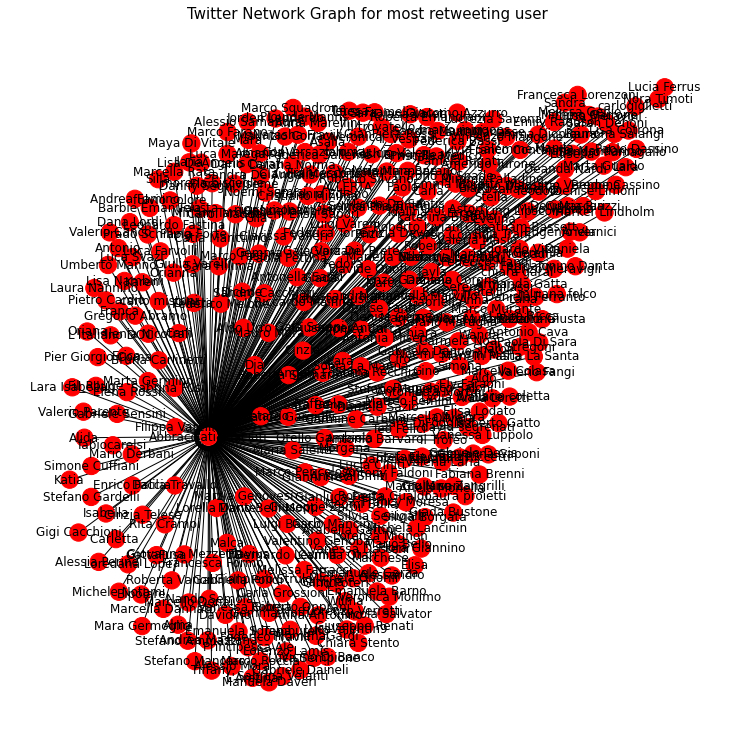

In [194]:
#what kind of accounts is this account retweeting from?
#map all accounts that chosen account has retweeted from with the color scheme according to the account type

graph_mr1 = nx.from_pandas_edgelist(df_mr1, source = 'name_actual', target = 'name_follows', create_using = nx.DiGraph())
plt.figure(figsize=(10,10))
nx.draw(graph_mr1, with_labels=True, node_color=colors_mr1)
plt.title("Twitter Network Graph for most retweeting user", fontsize=15)
plt.show()

In [195]:
print("Numer of nodes: {0}".format(graph_mr1.number_of_nodes()))
print("Numer of edges: {0}".format(graph_mr1.number_of_edges()))

Numer of nodes: 383
Numer of edges: 382


### Out Degree Centrality (How often is an account retweeted?)

In [196]:
#check on the top 5 accounts with the highest out degree centrality scores

dic2 = nx.out_degree_centrality(graph)

FiveHighest2 = nlargest(5, dic2, key = dic2.get) 
print("The 5 most retweeted users are: \n")
for val in FiveHighest2: 
    print(val, "\t:", dic2.get(val))

The 5 most retweeted users are: 

Â ♡ 	: 0.003998223011994669
ri öf 400™ 	: 0.003998223011994669
Carla 	: 0.003553976010661928
Petreanna. 	: 0.003553976010661928
Rick Smith 	: 0.003109729009329187


In [197]:
#save the name of one of the top 5 accounts to a variable for further investigation

most_retweeted = nlargest(5, dic2, key=dic2.get)[2]
print(most_retweeted)

Carla


In [198]:
#filter the dataset on that account chosen

df_mr2 = df[(df['name_actual']==most_retweeted)]
len(df_mr2)

9

In [199]:
#create a new color assignment for the filtered dataset

all_user_cat_mr2 = {**pd.Series(df_mr2['Account Type_actual'].values, index=df_mr2.name_actual).to_dict(), **pd.Series(df_mr2['Account Type_follows'].values, index=df_mr2.name_follows).to_dict()}

colors_mr2=[]
for u in all_user_cat_mr2.keys():
    colors_mr2.append(color_map[all_user_cat_mr2[u]])

len(colors_mr2)

8

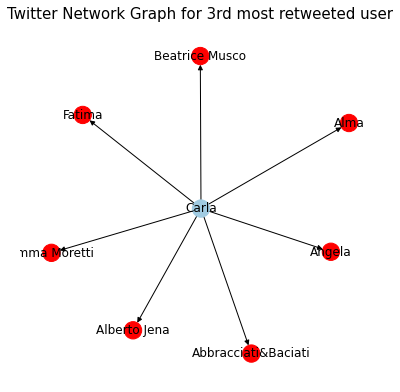

In [200]:
#what kind of accounts is this account retweeted from?
#map all accounts that chosen account is retweeted from with the color scheme according to the account type

graph_mr2 = nx.from_pandas_edgelist(df_mr2, source = 'name_actual', target = 'name_follows', create_using = nx.DiGraph())
plt.figure(figsize=(5,5))
nx.draw(graph_mr2, with_labels=True, node_color=colors_mr2)
plt.title("Twitter Network Graph for 3rd most retweeted user", fontsize=15)
plt.show()

### Betweenness centrality

In [201]:
#check on the top 5 accounts with the highest betweenness centrality scores

FiveHighest3 = nlargest(5, rt_centrality, key = rt_centrality.get) 
print("The 5 most retweeting users are: \n")
for val in FiveHighest3: 
    print(val, "\t:", rt_centrality.get(val))

The 5 most retweeting users are: 

Rick Smith 	: 1.7259818681409085e-05
Capital K 	: 1.6190335159682115e-05
Amber Craig 	: 1.4808233377758033e-05
Amy Urbach  	: 1.265281274166214e-05
Troy Hammond ™ 	: 1.0859371143689225e-05


In [202]:
#save the name of one of the top 5 accounts to a variable for further investigation

most_important = nlargest(5, rt_centrality, key=rt_centrality.get)[0]
print(most_important)

Rick Smith


In [203]:
#filter the dataset on that account chosen

df_mi = df[(df['name_follows']==most_important) | (df['name_actual']==most_important)]
len(df_mi)

13

In [204]:
#create a new color assignment for the filtered dataset

all_user_cat_mi = {**pd.Series(df_mi['Account Type_actual'].values, index=df_mi.name_actual).to_dict(), **pd.Series(df_mi['Account Type_follows'].values, index=df_mi.name_follows).to_dict()}

colors_mi=[]
for u in all_user_cat_mi.keys():
    colors_mi.append(color_map[all_user_cat_mi[u]])

len(colors_mi)

12

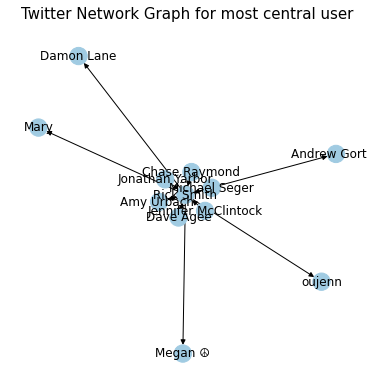

In [205]:
#what kind of accounts is this account retweeting from or retweeted by?
#map all accounts that chosen account is connected to with the color scheme according to the account type

graph_mi = nx.from_pandas_edgelist(df_mi, source = 'name_actual', target = 'name_follows', create_using = nx.DiGraph())
plt.figure(figsize=(5,5))
nx.draw(graph_mi, with_labels=True, node_color=colors_mi)
plt.title("Twitter Network Graph for most central user", fontsize=15)
plt.show()